In [1]:
addprocs(5);

In [1]:
using Revise
using Grid
using Plots
using JuMIT

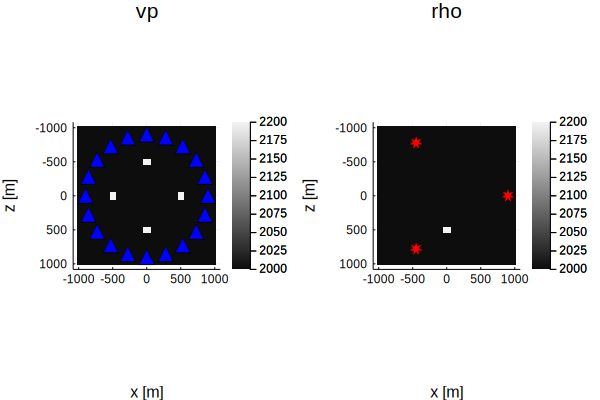

In [2]:
model = JuMIT.Gallery.Seismic(:acou_homo2);
JuMIT.Models.Seismic_addon!(model, ellip_rad=50., ellip_loc=[500.,0.],ellip_pert=0.1,randn_perc=0.0, fields=[:χvp,:χρ])
JuMIT.Models.Seismic_addon!(model, ellip_rad=50., ellip_loc=[0.,500.],ellip_pert=0.1,randn_perc=0.0, fields=[:χvp])
JuMIT.Models.Seismic_addon!(model, ellip_rad=50., ellip_loc=[-500.,0.],ellip_pert=0.1,randn_perc=0.0, fields=[:χvp])
JuMIT.Models.Seismic_addon!(model, ellip_rad=50., ellip_loc=[0.,-500.],ellip_pert=0.1,randn_perc=0.0, fields=[:χvp])
model0 = JuMIT.Gallery.Seismic(:acou_homo2);
acqgeom = JuMIT.Acquisition.Geom_circ(nss=3,nr=20,rad=[900.,900.])#,θlim=[90.,180.]);

JuMIT.Plots.seismic(model, color=:autumn )
JuMIT.Plots.geom!(acqgeom, markersize=7, subplot=[1,2])

	Source Acquisition:	
	> number of supersources:	3
	> sources per supersource:	min	1	max	1
	> frequency:	min	0.3538461538461538	max	8.846153846153845	peak	2.83076923076923
	> time:	min	0.0	max	2.8173913043478263
	> samples:	325


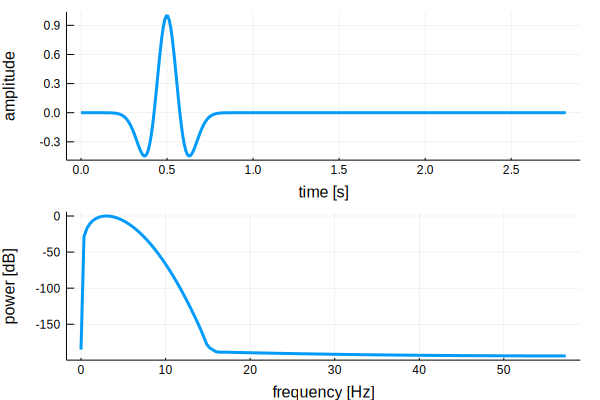

In [3]:
acqsrc=JuMIT.Acquisition.Src_fixed_mod(acqgeom.nss,1,[:P],mod=model,nλ=3)
tgrid=acqsrc.tgrid
JuMIT.Plots.src(acqsrc, w=3)

In [4]:
@time pa = JuMIT.FWI.Param(acqsrc,mprecon_factor=1.0, 
    acqgeom, tgrid,:fdtd,:migr,model0,modm_obs=model, 
    igrid=Grid.M2D_resamp(model.mgrid,50.,50.,), 
    tlagssf_fracs=[0.1,0.4],
    optims=[:cls],
    verbose=false, born_flag=true);

 20.790204 seconds (9.88 M allocations: 499.362 MiB, 1.62% gc time)


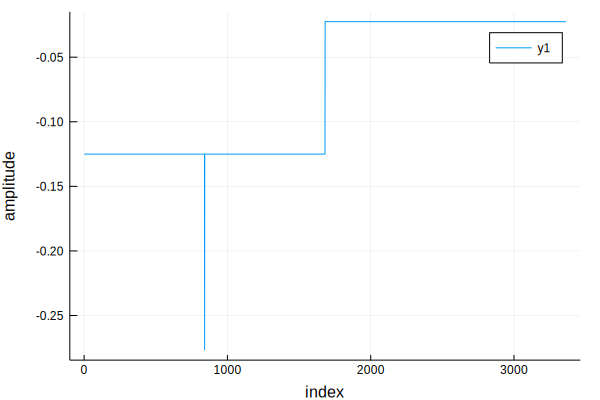

In [18]:
# create an inversion vector with perturbation only at one location
x=JuMIT.FWI.xfwi_pert_x(pa, [0,0]);
plot(x, xlabel="index", ylabel="amplitude")

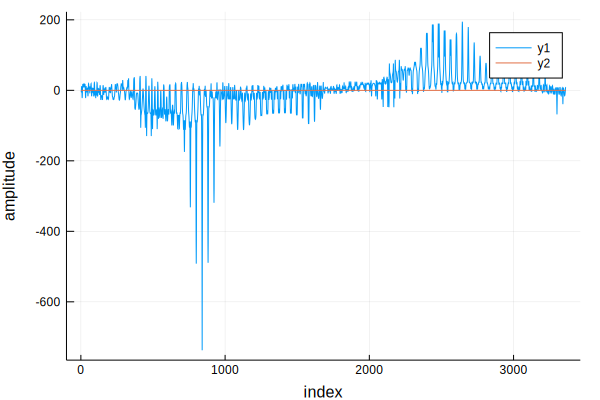

In [19]:
xx=zeros(x) # allocate xx=FᵀF x
JuMIT.FWI.Fadj_Fborn_x!(xx,x,pa)
plot(xx, xlabel="index", ylabel="amplitude")
plot!(x)

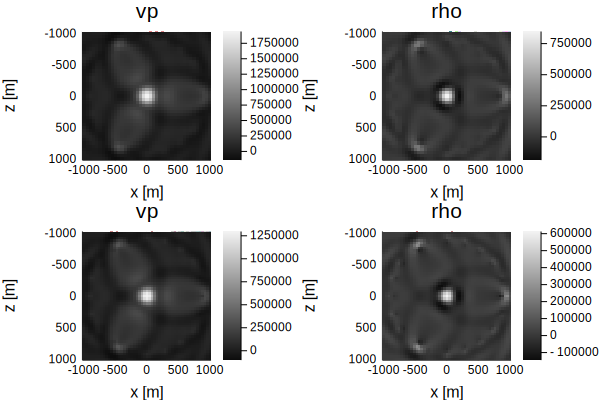

In [20]:
p1=JuMIT.Plots.seismic(pa.gmodi)
p2=JuMIT.Plots.seismic(pa.gmodm)
plot(p1,p2, layout=(2,1))